```
From: https://github.com/ksatola
Version: 0.0.1

TODOs
1. https://scikit-learn.org/stable/modules/clustering.html

```

# Clustering Algorithms
**Clustering** is an unsupervised machine learning technique used to divide a group into cohorts. It is unsupervised because we don’t give the model any labels; it just inspects the features and determines which samples are similar and belong in a cluster. 

**Finding clusters is one thing, understanding them is another.**

In [1]:
# Connect with underlying Python code
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

In [2]:
from datasets import (
    get_dataset
)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [4]:
# target = 'class'
df = get_dataset('sonar')
df.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v51,v52,v53,v54,v55,v56,v57,v58,v59,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
# Missing values?
df.isnull().mean().value_counts()

0.0    61
dtype: int64

In [6]:
y = df[['class']]
X = df.drop(columns='class')

## K-Means
The [K-means algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) requires the user to pick the number of clusters or `k`. It then randomly chooses k `centroids` and assigns each sample to a cluster based on a `distance metric` from the centroid. Following the assignment, it recalculates the centroids based on the center of every sample assigned to a label. It then repeats assigning samples to clusters based on the new centroids. After a few iterations it should converge.

Because clustering uses `distance metrics` to determine which samples are similar, the behavior may change depending on the scale of the data. You can `standardize the data` and put all of the features on the same scale. Some have suggested that an SME might advise against standardizing if the scale hints that some features have more importance. We will standardize the data here in this example.

In this example, we will cluster the Sonar data. We will start with two clusters to see if the clustering can tease apart mine or rock (we won’t leak the class data into the clustering and will only use X, not y).

Unsupervised algorithms have a `.fit` method and a `.predict` method. We only pass X into .fit

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X_std = StandardScaler().fit_transform(X)

km = KMeans(n_clusters=2,
       algorithm='auto', 
       copy_x=True,
       init='k-means++', 
       max_iter=300, 
       n_init=10, 
       random_state=42, 
       tol=0.0001, 
       verbose=0)
km.fit(X_std)

KMeans(n_clusters=2, random_state=42)

After the model is trained, we can call the `.predict` method to assign new samples to a cluster.

In [9]:
km.cluster_centers_ 

array([[ 0.63404456,  0.64842498,  0.50612145,  0.36065907,  0.18305333,
         0.19789607,  0.31613038,  0.5281182 ,  0.50576346,  0.36631847,
         0.13841238,  0.05660332, -0.10516757, -0.24211214, -0.2271103 ,
        -0.25665972, -0.42716585, -0.63206626, -0.6441331 , -0.5206152 ,
        -0.56721604, -0.7662377 , -0.78596803, -0.73099761, -0.73714312,
        -0.70892736, -0.54928084, -0.13115747,  0.10610372,  0.54655775,
         0.71436143,  0.78096142,  0.80723262,  0.85727587,  0.85526825,
         0.842557  ,  0.83545867,  1.0251495 ,  0.99935732,  0.96146089,
         1.10510082,  1.08248785,  0.95626712,  0.97208023,  1.19012749,
         1.12303133,  1.02538083,  1.06557202,  0.94883773,  0.83569428,
         0.62577707,  0.61943616,  0.53097566,  0.42114506,  0.5717032 ,
         0.42169359,  0.60080048,  0.55459924,  0.58702264,  0.40721964],
       [-0.19539738, -0.19982908, -0.15597454, -0.11114651, -0.05641266,
        -0.06098684, -0.09742383, -0.16275341, -0.

In [10]:
km.labels_

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [11]:
# Sum of squared distance to cluster centroid
km.inertia_

10652.016544249213

In [12]:
# Number of iterations
km.n_iter_

13

In [13]:
X_km = km.predict(X_std)
X_km

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

If you don’t know ahead of time how many clusters you need, you can run the algorithm with a range of sizes and evaluate various metrics. It can be tricky.

You can roll your own `elbow plot` using the `.inertia_` calculation. Look for where the curve bends as that is potentially a good choice for the number of clusters.

For plots without an elbow, we have a few options. We can use other metrics, some of which are shown below. We can also inspect a visualization of the clustering and see if clusters are visible. We can add features to the data and see if that helps with clustering.

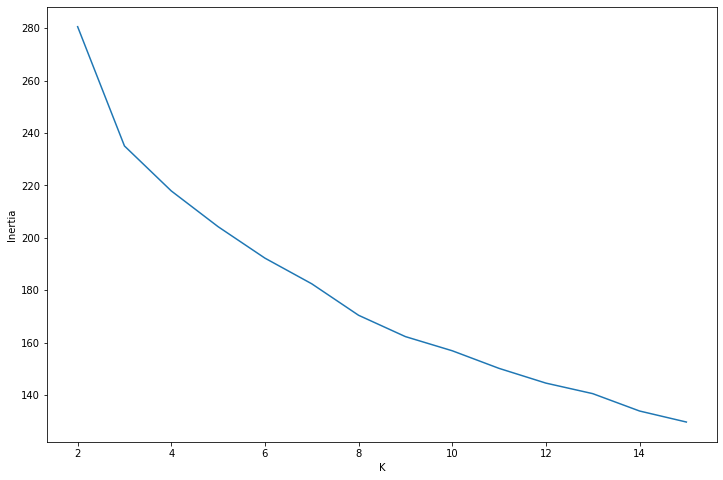

In [14]:
inertias = []
sizes = range(2, 16)

for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X)
    inertias.append(k2.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")
fig.savefig("images/k_means_elbow_plot.png", dpi=300)

`Scikit-learn` has other **clustering metrics** when the ground truth labels are not known. We can calculate and plot those as well. 
- **The Silhouette Coefficient** is a value between -1 and 1. The higher the score, the better. 1 indicates tight clusters, and 0 means overlapping clusters. From that measure, two clusters gives us the best score.
- **The Calinski-Harabasz Index** is the ratio of between-cluster dispersion and within-cluster dispersion. A higher score is better. Two clusters gives the best score for this metric.
- **The Davis-Bouldin Index** is the average similarity between each cluster and the closest cluster. Scores range from 0 and up. 0 indicates better clustering.

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


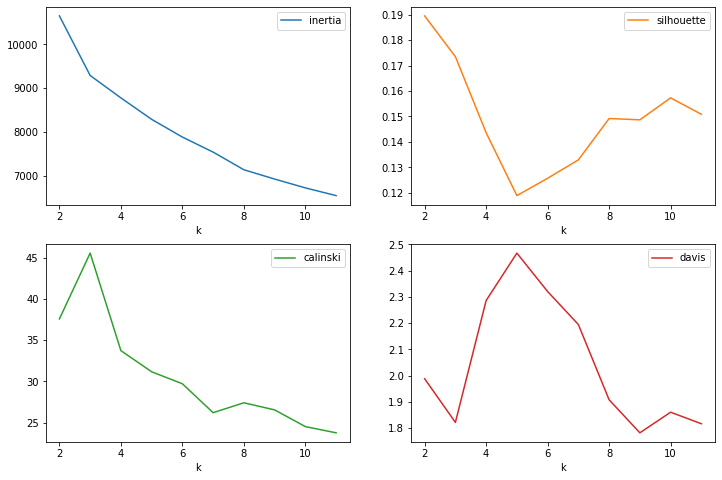

In [15]:
from sklearn import metrics

inertias = []
sils = []
chs = []
dbs = []
sizes = range(2, 12)

for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X_std)
    inertias.append(k2.inertia_)
    sils.append(metrics.silhouette_score(X, k2.labels_))
    chs.append(metrics.calinski_harabasz_score(X, k2.labels_))
    dbs.append(metrics.davies_bouldin_score(X, k2.labels_))

fig, ax = plt.subplots(figsize=(12, 8))
(

    pd.DataFrame(
        {
            "inertia": inertias,
            "silhouette": sils,
            "calinski": chs,
            "davis": dbs,
            "k": sizes,
        }
    )
    .set_index("k")
    .plot(ax=ax, subplots=True, layout=(2, 2))
)
fig.savefig("images/clustering_metrics_k-means.png", dpi=300)

Another technique for determining clusters is to **visualize the silhouette scores for each cluster**. Yellowbrick has a visualizer for this.

The vertical dotted red line in this plot is the average score. One way to interpret it is to make sure that each cluster bumps out above the average, and the cluster scores look decent. Make sure you are using the same x limits (`ax.set_xlim`).

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


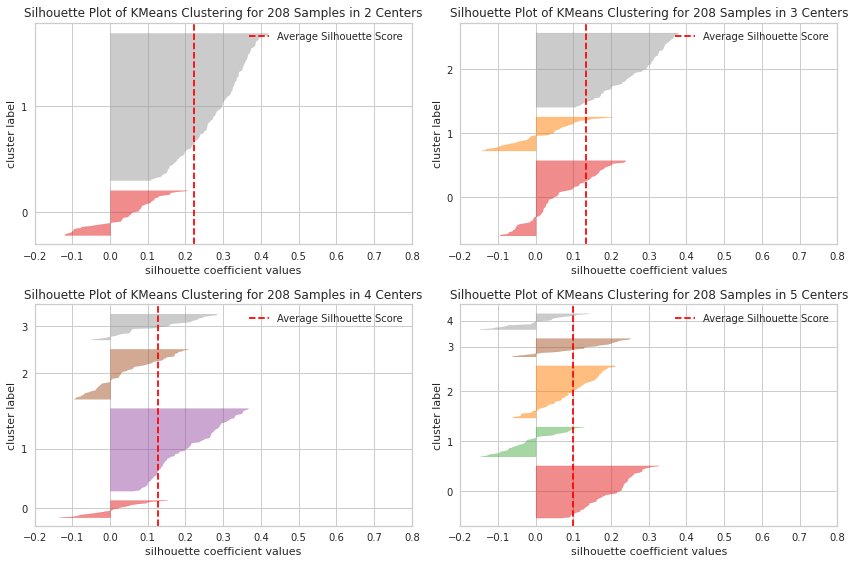

In [16]:
from yellowbrick.cluster.silhouette import (
    SilhouetteVisualizer,
)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.reshape(4)
for i, k in enumerate(range(2, 6)):
    ax = axes[i]
    sil = SilhouetteVisualizer(
        KMeans(n_clusters=k, random_state=42),
        ax=ax,
    )
    sil.fit(X_std)
    sil.finalize()
    ax.set_xlim(-0.2, 0.8)

plt.tight_layout()
fig.savefig("images/clustering_silhouette_per_cluster.png", dpi=300)

## Hierarchical (Agglomerative) Clustering
[Hierarchical clustering](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html) is another method. You start off with each sample in its own cluster. Then you combine the nearest clusters. Repeat until done while keeping track of the nearest sizes.

When you have finished this, you will have a `dendrogram`, or a tree that tracks when clusters were created and what the distance metric was. You can use the `scipy` library to visualize the dendrogram. As you can see, if you have many samples the leaf nodes are hard to read:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


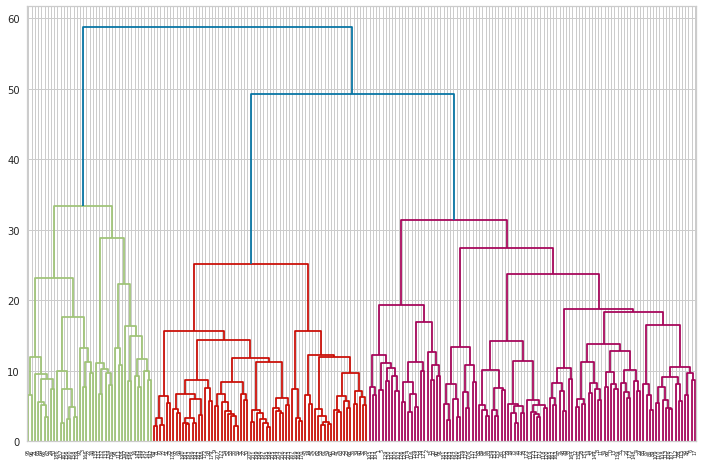

In [17]:
from scipy.cluster import hierarchy

fig, ax = plt.subplots(figsize=(12, 8))
dend = hierarchy.dendrogram(
    hierarchy.linkage(X_std, method="ward")
)
fig.savefig("images/clustering_dendogram.png", dpi=300)

Once you have the `dendrogram`, you have all the clusters (from one to the size of the samples). The **heights represent how similar clusters are when they are joined**. In order to find how many clusters are in the data, you would want to **cut a horizontal line through where it would cross the tallest lines**.

In this case, it looks like when you perform that cut, you have three clusters.

The previous plot was a little noisy with all of the samples in it. You can also use the `truncate_mode` parameter to combine the leaves into a single node.

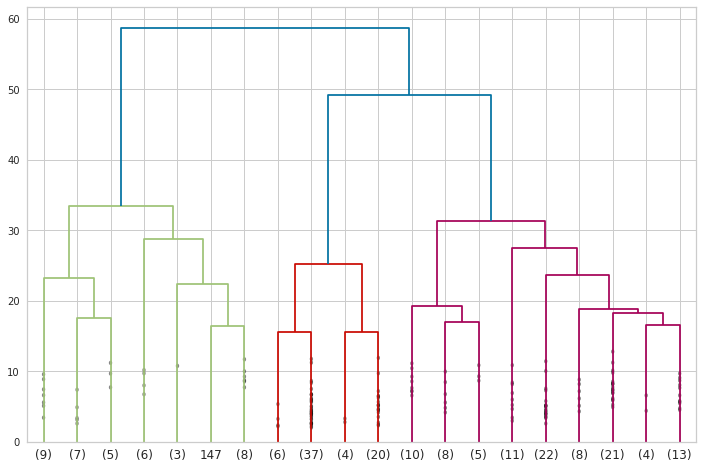

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
dend = hierarchy.dendrogram(
    hierarchy.linkage(X_std, method="ward"), 
                      truncate_mode="lastp",
                      p=20,
                      show_contracted=True,
)
fig.savefig("images/clustering_dendogram_truncated.png", dpi=300)

**Truncated hierarchical clustering dendrogram:** If we cut across the largest vertical lines, we get three clusters.

Once we know how many clusters we need, we can use scikit-learn to create a model. The [fastcluster package](http://danifold.net/fastcluster.html) provides an optimized agglomerative clustering package if the [scikit-learn implementation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) is too slow.

In [19]:
from sklearn.cluster import (
    AgglomerativeClustering,
)

ag = AgglomerativeClustering(
    n_clusters=3,
    affinity="euclidean",
    linkage="ward",
)
ag.fit(X_std)

AgglomerativeClustering(n_clusters=3)

In [20]:
X_km = ag.fit_predict(X_std)
X_km

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0,
       0, 2, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
ag.labels_

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0,
       0, 2, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Understanding Clusters
We can use the grouping functionality in pandas to examine the differences in the clusters. The code below examines the `mean` and `variance` for each feature.

In [22]:
km = KMeans(n_clusters=2)

km.fit(X_std)
labels = km.predict(X_std)
(
    X.assign(cluster=labels)
    .groupby("cluster")
    .agg(["mean", "var"])
    .T
    .style.background_gradient(cmap='RdBu', axis=1)
)

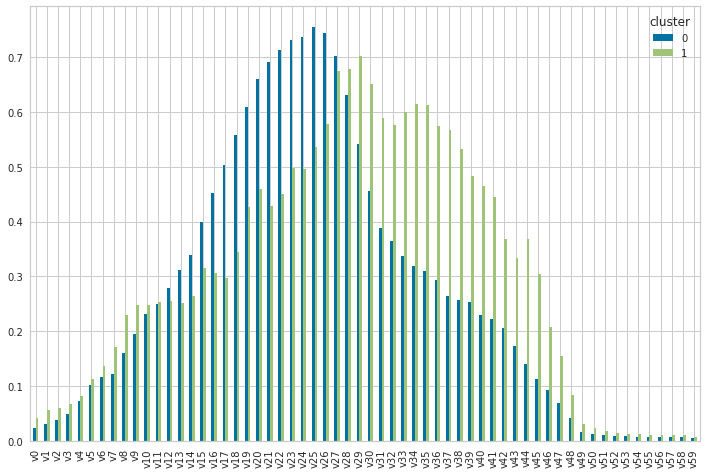

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
(
    X.assign(cluster=labels, survived=y)
    .groupby("cluster")
    .mean()
    .T.plot.bar(ax=ax)
)
fig.savefig("images/clustering_mean_bar_plot.png",  dpi=300, bbox_inches="tight")

If we want to examine a single feature, we can use the pandas `.describe` method.

In [25]:
(
    X.assign(cluster=labels)
    .groupby("cluster")
    .v59.describe()
    .T
)

cluster,0,1
count,156.000000,52.000000
mean,0.005844,0.008496
std,0.003725,0.007428
min,0.000600,0.001100
25%,0.003000,0.003525
50%,0.005250,0.006750
75%,0.007700,0.010225
max,0.019800,0.043900


We can also create a `surrogate model` to explain the clusters. Here we use a decision tree to explain them. This also shows that pclass (which had a large difference in the mean) is very important

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_std, y)
for col, val in sorted(
    zip(X.columns, dt.feature_importances_),
    key=lambda col_val: col_val[1],
    reverse=True,):
    print(f"{col:10}{val:10.3f}")

v10            0.267
v44            0.099
v15            0.091
v3             0.081
v30            0.072
v27            0.071
v33            0.061
v8             0.042
v14            0.039
v51            0.037
v0             0.032
v17            0.024
v2             0.019
v43            0.018
v57            0.018
v32            0.017
v6             0.013
v1             0.000
v4             0.000
v5             0.000
v7             0.000
v9             0.000
v11            0.000
v12            0.000
v13            0.000
v16            0.000
v18            0.000
v19            0.000
v20            0.000
v21            0.000
v22            0.000
v23            0.000
v24            0.000
v25            0.000
v26            0.000
v28            0.000
v29            0.000
v31            0.000
v34            0.000
v35            0.000
v36            0.000
v37            0.000
v38            0.000
v39            0.000
v40            0.000
v41            0.000
v42            0.000
v45          

And we can visualize the decisions. It shows that `v10` is the first feature the surrogate looks at to make a decision.

In [27]:
from io import StringIO
from sklearn import tree
import pydotplus 

dot_data = StringIO()

tree.export_graphviz(
    dt,
    out_file=dot_data,
    feature_names=X.columns,
    class_names=["0", "1"],
    max_depth=2,
    filled=True,
)

g = pydotplus.graph_from_dot_data(dot_data.getvalue())
g.write_png("images/clustering_surrogate_model.png")

True

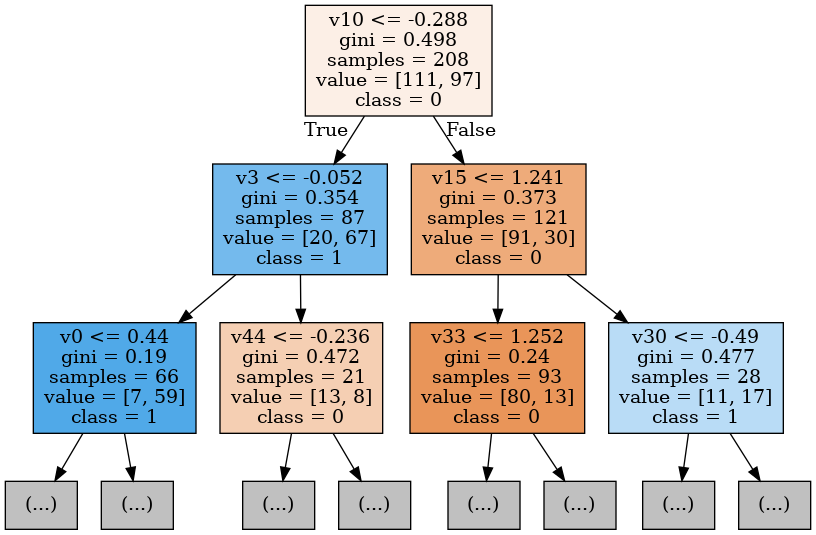

In [28]:
from IPython.display import Image
Image(g.create_png())

## Combine PCA and K-means
We can combine `Principal Components Analysis (PCA)` and `K-means Clustering` to improve segmentation results. There are varying reasons for using a dimensionality reduction step such as PCA prior to data segmentation. By reducing the number of features:
- we’re improving the performance of our algorithm.
- the noise is also reduced.
[This paper](http://ranger.uta.edu/~chqding/papers/KmeansPCA1.pdf) discusses the exact relationship between the techniques and why a combination of both techniques could be beneficial.

In [29]:
df.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v51,v52,v53,v54,v55,v56,v57,v58,v59,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Because the model is not familiar with our context, we need to standardize data, so our clustering algorithm do not discard variables which are of less numerical values. We want to treat all the features equally. And we can achieve that by transforming the features in a way that makes their values fall within the same numerical range. Thus, the differences between their values will be comparable. This process is commonly referred to as `standardization`.

In [30]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

The next step is to perform dimensionality reduction.

In [31]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_std)

PCA()

Then, we need to decide how many features we would like to keep.

In [32]:
evr = pca.explained_variance_ratio_
evr

array([2.03465567e-01, 1.88972164e-01, 8.54998852e-02, 5.67919035e-02,
       5.00707995e-02, 4.06499523e-02, 3.27899181e-02, 3.04646584e-02,
       2.56596098e-02, 2.49110230e-02, 2.07528022e-02, 1.90198997e-02,
       1.74697957e-02, 1.53848421e-02, 1.42779702e-02, 1.36095862e-02,
       1.23460825e-02, 1.16864603e-02, 1.03077448e-02, 9.79001875e-03,
       9.44079287e-03, 8.87560657e-03, 8.39874096e-03, 7.70838079e-03,
       7.21929579e-03, 6.96370919e-03, 6.15371046e-03, 5.31600397e-03,
       5.24714746e-03, 4.95397252e-03, 4.76203236e-03, 4.36167127e-03,
       3.72450789e-03, 3.36705265e-03, 3.10510516e-03, 3.03165574e-03,
       2.87697343e-03, 2.44574090e-03, 2.19495027e-03, 2.10115014e-03,
       1.84558556e-03, 1.58235827e-03, 1.36752681e-03, 1.25733376e-03,
       1.02731989e-03, 9.49170287e-04, 9.38182230e-04, 7.07668927e-04,
       5.93650363e-04, 5.21305809e-04, 4.87269602e-04, 4.74212197e-04,
       3.83734054e-04, 3.66705614e-04, 3.21878907e-04, 2.70234769e-04,
      

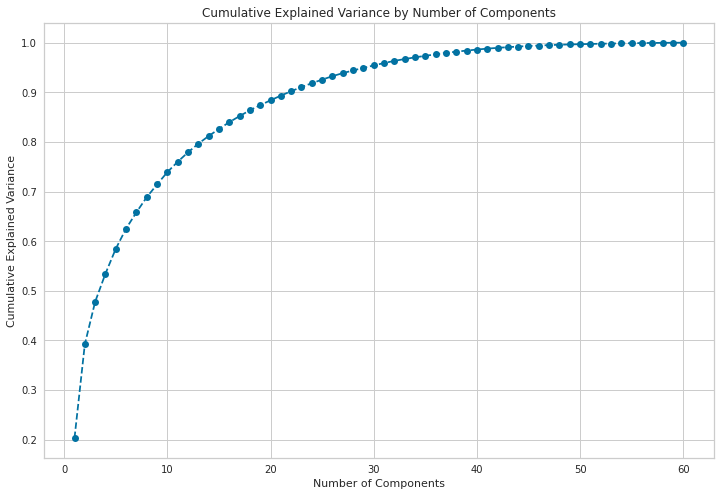

In [33]:
plt.figure(figsize=(12, 8))
plt.plot(
    range(1, len(evr)+1),
    evr.cumsum(),
    marker="o",
    linestyle="--",
)
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show();

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 13 components.

Next, we perform PCA with the chosen number of components.

In [34]:
pca = PCA(n_components=13)
pca_fit = pca.fit(X_std)
print(f"Explained Variance: {pca_fit.explained_variance_ratio_.sum()}")

Explained Variance: 0.7965179775011404


We need only the calculated resulting components scores for the elements in our data set. We’ll incorporate the newly obtained PCA scores in the K-means algorithm. That’s how we can perform segmentation based on principal components scores instead of the original features.

In [35]:
scores_pca = pca_fit.transform(X_std)
scores_pca

array([[ 1.92116817, -1.37089312, -1.66647597, ..., -0.61625237,
         0.32250116,  0.34971062],
       [-0.48012458,  7.58638801, -1.27573428, ...,  0.32150441,
        -0.56775462,  0.26864808],
       [ 3.8592282 ,  6.43986016, -0.03063464, ..., -0.53227078,
         0.30950839, -1.93204161],
       ...,
       [-2.29321041, -2.75544556,  2.38846736, ...,  1.02360995,
        -1.80576057, -0.69758452],
       [-3.11446433, -1.85054952,  2.42048603, ...,  0.8055157 ,
        -0.85986769, -0.6776332 ],
       [-3.23862419, -2.27709396,  1.70612762, ..., -0.41752993,
        -0.5178568 ,  0.79964193]])

It is time to combine `PCA` and `K-mean`s to segment our data, where we use the scores obtained by the PCA for the fit. K-means doesn’t determine the number of clusters in your solution. 

In any case, it turns out that we ourselves need to determine the number of clusters in a K-means algorithm. In order to do so, we run the algorithm with a different number of clusters. Then, we determine the `Within Cluster Sum of Squares` or `WCSS` for each solution. Based on the values of the WCSS and an approach known as the `Elbow method`, we make a decision about how many clusters we’d like to keep.

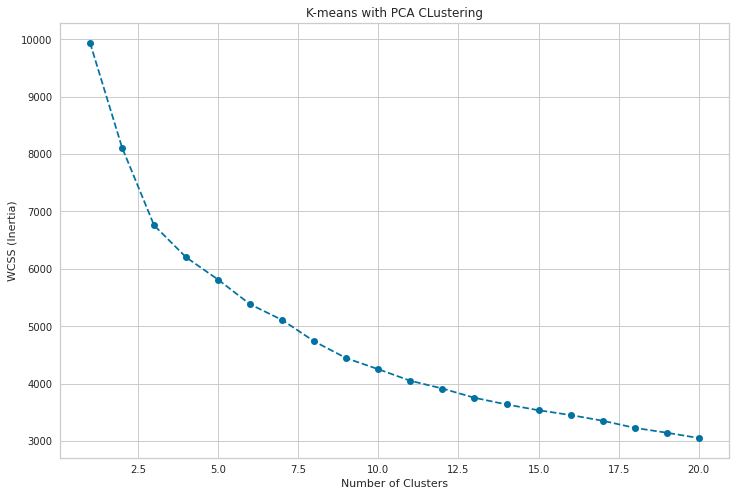

In [36]:
wcss = []
sizes = range(1, 21)

for k in sizes:
    kmeans_pca = KMeans(random_state=42, n_clusters=k)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
pd.Series(wcss, index=sizes).plot(ax=ax, marker='o', linestyle='--')
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("WCSS (Inertia)")
plt.title('K-means with PCA CLustering')
fig.savefig("images/k_means_with_pca_plot.png", dpi=300)

And from this graph, we determine the number of clusters we’d like to keep. To that effect, we use the `elbow method`. The approach consists of looking for a kink or elbow in the WCSS graph. Usually, the part of the graph before the elbow would be steeply declining, while the part after it – much smoother. In this instance, the kink comes at the 3 clusters mark. So, we’ll be keeping a three-cluster solution.

In [37]:
km_pca = KMeans(n_clusters=3,
       algorithm='auto', 
       copy_x=True,
       init='k-means++', 
       max_iter=300, 
       n_init=10, 
       random_state=42, 
       tol=0.0001, 
       verbose=0)
km_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=42)

In [38]:
scores_km_pca = km_pca.transform(scores_pca)
scores_km_pca[0:5]

array([[ 5.43750647,  5.88992338,  6.54044763],
       [11.67775016, 12.40348358,  7.38796428],
       [12.41097446, 10.47928944,  9.13341047],
       [ 8.54934137,  5.88390438,  9.68825927],
       [ 6.6276209 ,  8.90906292,  5.48113532]])

### Analyze PCA and K-means Results
Before all else, we’ll create a new data frame. It allows us to add in the values of the separate components to our segmentation data set. The components’ scores are stored in the `scores_km_pca` variable. Let’s label them `PC1`, `PC2` and `PC3`. In addition, we also append the `Segmet K-means PCA` labels to the new data frame.

In [39]:
df.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v51,v52,v53,v54,v55,v56,v57,v58,v59,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [40]:
df_pca_km = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_km_pca)], axis=1)
df_pca_km.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v54,v55,v56,v57,v58,v59,class,0,1,2
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,5.437506,5.889923,6.540448
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,11.677750,12.403484,7.387964
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,12.410974,10.479289,9.133410
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,8.549341,5.883904,9.688259
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,6.627621,8.909063,5.481135


In [41]:
df_pca_km.columns.values[-3:] = ['PC1', 'PC2', 'PC3']
df_pca_km.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v54,v55,v56,v57,v58,v59,class,PC1,PC2,PC3
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,5.437506,5.889923,6.540448
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,11.677750,12.403484,7.387964
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,12.410974,10.479289,9.133410
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,8.549341,5.883904,9.688259
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,6.627621,8.909063,5.481135


In [42]:
df_pca_km['Segmet K-means PCA'] = km_pca.labels_
df_pca_km.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v55,v56,v57,v58,v59,class,PC1,PC2,PC3,Segmet K-means PCA
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0167,0.0180,0.0084,0.0090,0.0032,R,5.437506,5.889923,6.540448,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0191,0.0140,0.0049,0.0052,0.0044,R,11.677750,12.403484,7.387964,2
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0244,0.0316,0.0164,0.0095,0.0078,R,12.410974,10.479289,9.133410,2
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0073,0.0050,0.0044,0.0040,0.0117,R,8.549341,5.883904,9.688259,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0015,0.0072,0.0048,0.0107,0.0094,R,6.627621,8.909063,5.481135,2


We create a new column named ‘Segment’ and map the four clusters directly inside it.

In [43]:
df_pca_km['Segmet K-means PCA'] = df_pca_km['Segmet K-means PCA'].map({
    0: 'first',
    1: 'second',
    2: 'third',
})
df_pca_km.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v55,v56,v57,v58,v59,class,PC1,PC2,PC3,Segmet K-means PCA
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0167,0.0180,0.0084,0.0090,0.0032,R,5.437506,5.889923,6.540448,first
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0191,0.0140,0.0049,0.0052,0.0044,R,11.677750,12.403484,7.387964,third
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0244,0.0316,0.0164,0.0095,0.0078,R,12.410974,10.479289,9.133410,third
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0073,0.0050,0.0044,0.0040,0.0117,R,8.549341,5.883904,9.688259,second
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0015,0.0072,0.0048,0.0107,0.0094,R,6.627621,8.909063,5.481135,third


Let’s finish off by visualizing our clusters on a 2D plane. It’s a 2D visualization, so we need to choose two components and use them as axes. **The point of PCA was to determine the most important components. This way, we can be absolutely sure that the first two components explain more variance than the third one.**

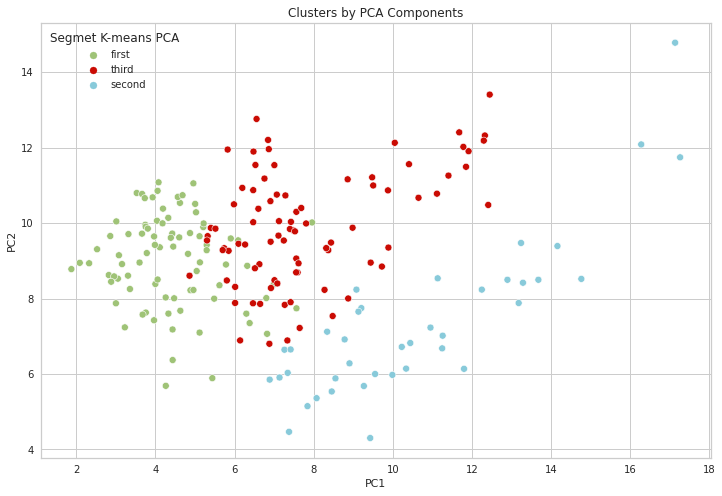

In [44]:
x_axis = df_pca_km['PC1']
y_axis = df_pca_km['PC2']

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=x_axis,
    y=y_axis,
    hue=df_pca_km['Segmet K-means PCA'],
    palette=['g', 'r', 'c'],
)
plt.title('Clusters by PCA Components')
plt.show();

For comparison, if we run only the k-means algorithm without the PCA step, the result would be the following.

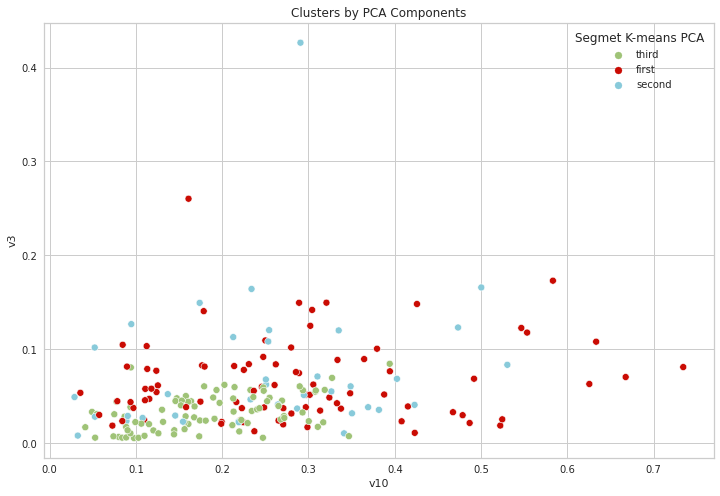

In [45]:
km_pca = KMeans(n_clusters=3,
       algorithm='auto', 
       copy_x=True,
       init='k-means++', 
       max_iter=300, 
       n_init=10, 
       random_state=42, 
       tol=0.0001, 
       verbose=0)
km_pca.fit(X_std)

df_pca_km['Segmet K-means PCA'] = km_pca.labels_
df_pca_km['Segmet K-means PCA'] = df_pca_km['Segmet K-means PCA'].map({
    0: 'first',
    1: 'second',
    2: 'third',
})

x_axis = df_pca_km['v10']
y_axis = df_pca_km['v3']

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=x_axis,
    y=y_axis,
    hue=df_pca_km['Segmet K-means PCA'],
    palette=['g', 'r', 'c'],
)
plt.title('Clusters by PCA Components')
plt.show();

**When we employ `PCA` prior to using `K-means` we can visually separate almost the entire data set.** That was one of `the biggest goals of PCA – to reduce the number of variables by combining them into bigger, more meaningful features`. Not only that, but they are `orthogonal` to each other. This means that the difference between components is as big as possible.

Finally, it is important to note that our data set contained only a few features from the get-go. So, when we further reduced the dimensionality, using ‘P C A’ we found out we only need three components to separate the data.

That’s the reason why even a two-dimensional plot is enough to see the separation. This might not always be the case. You may have more features and more components respectively. Then you might need a different way to represent the results of PCA.